<a href="https://colab.research.google.com/github/NeuralDevD/NeuralDevD/blob/main/LTSM_for_Fashion_Items_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Approach To Fasion Image Classification

On this Notebook I have developed a time series approach based classification for Fashion items classification based on FASION MNIST Data set.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [14]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (scale pixel values to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
# y_train, y_test = to_categorical(y_train, 10)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # Assign the result to y_train
y_test = to_categorical(y_test, 10)   # Apply to_categorical to y_test separately



In [15]:
# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(28, 28), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 112ms/step - accuracy: 0.6522 - loss: 0.9289 - val_accuracy: 0.8127 - val_loss: 0.5100
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 110ms/step - accuracy: 0.8191 - loss: 0.4912 - val_accuracy: 0.8353 - val_loss: 0.4356
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8465 - loss: 0.4140

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8879 - loss: 0.3043
Test Accuracy: 0.8881


In [11]:
# Save the model
model.save("fashion_mnist_lstm.h5")


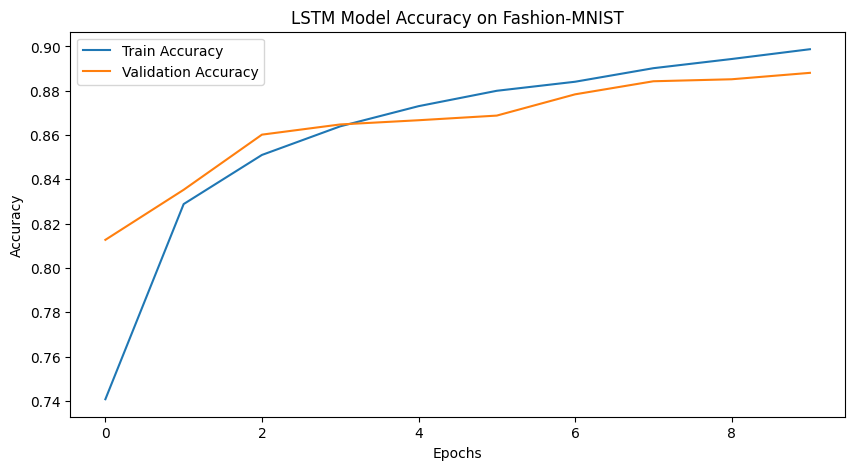

In [19]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Model Accuracy on Fashion-MNIST')
plt.show()